<a href="https://colab.research.google.com/github/EnzoPavez/Datasets-Pavez-Enzo/blob/main/ProyectoDS__Parte_II_Pavez__Enzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalacion API Kaggle
Instalacion de las credencias de la API de Kaggle para descargar los datasets (solo es necesario ejecutar una vez)

In [42]:
#Instala Kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#Crea la ruta necesaria para guardar el archivo de credenciales de la API
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [44]:
#Descarga el archivo con las credenciales para la API de Kaggle en la carpeta actual
!gdown --id 1yI2x4qazF5vuMFw_aof-4laGe366TyrJ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yI2x4qazF5vuMFw_aof-4laGe366TyrJ
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 190kB/s]


In [45]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [46]:
#Copia el archivo de credenciales de API en la carpeta ncesaria para que funcione
!cp kaggle.json ~/.kaggle/

In [47]:
#Modificacion de permisos del archivo para su correcto funcionamiento
!chmod 600 ~/.kaggle/kaggle.json

In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle 

import warnings
warnings.filterwarnings('ignore')



## Predecir la deserción y el éxito académico de los estudiantes

Fuente: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

**Objetivo**

 El conjunto de datos se utilizara para construir modelos de aprendizaje automático para predecir el rendimiento académico y la deserción escolar. El conjunto de datos es útil para los investigadores que desean realizar estudios comparativos sobre el rendimiento académico de los estudiantes y también para la capacitación en el área de aprendizaje automático.

**Abstract** 

Las instituciones de educación superior registran una cantidad importante de datos sobre sus estudiantes, lo que representa un potencial considerable para generar información, conocimiento y seguimiento. Tanto la deserción escolar como el fracaso educativo en la educación superior son un obstáculo para el crecimiento económico, el empleo, la competitividad y la productividad, impactando directamente en la vida de los estudiantes y sus familias, las instituciones de educación superior y la sociedad en su conjunto. El conjunto de datos descrito aquí resulta de la agregación de información de diferentes fuentes de datos inconexas e incluye datos demográficos, socioeconómicos, macroeconómicos y académicos sobre matrícula y desempeño académico al final del primer y segundo semestre.

Este conjunto de datos proporciona una visión integral de los estudiantes matriculados en varios títulos universitarios que se ofrecen en una institución de educación superior. Incluye datos demográficos, factores socioeconómicos e información sobre el rendimiento académico que se pueden utilizar para analizar los posibles predictores de la deserción y el éxito académico de los estudiantes. Este conjunto de datos contiene varias bases de datos inconexas que contienen información relevante disponible en el momento de la inscripción, como el modo de solicitud, el estado civil, el curso elegido y más. Además, estos datos se pueden utilizar para estimar el rendimiento general de los estudiantes al final de cada semestre al evaluar las unidades curriculares acreditadas/inscritas/evaluadas/aprobadas, así como sus respectivas calificaciones. Esta poderosa herramienta de análisis proporcionará información valiosa sobre lo que motiva a los estudiantes a permanecer en la escuela o abandonar sus estudios por una amplia gama de disciplinas como la agronomía, el diseño, la educación, la enfermería, el periodismo, la gestión, el servicio social o las tecnologías.


 **Preguntas**

 ¿Qué porcentaje de graduados existen a lo largo del año?

 ¿Cuál es el Genero de la mayor parte de los estudiantes?

 ¿Cuáles carreras tienen mayor número de graduados, inscriptos y abandonos y cuál es la que menos tiene?

 ¿ Que edad tienen los estudiantes que ingresan?

 ¿De que trabajan los padres de quienes más se gradúan?

 ¿Cuál es el porcentaje de graduados que deben la cuota?

 ¿ Cual es la correlación de cada variable con respecto a las otras?

 **Hipotesis**

 Mi hipotesis es que hay mas graduados e inscriptos que personas que abandonan, creo que no va haber  diferencia alguna entre el Genero a la hora de los graduados e inscriptos. A sumo que la dificultad de la carrera corresponderá al nivel de graduados. 

 Entiendo que todos los alumnos deberan haber terminado la educación secundaria, tanto como la inicial, por ende creo que mientras más jóvenes ingresan a estudiar mas fácil es que se gradúen.

 Considero que aquellos padres con mejores profesiones van a tener mayor numero de graduados, ademas aquellos que deben cuotas van a tener un porcentaje mayor de abandono y que quienes perciben una beca se gradúan mas fácilmente.

 Creo que va  a ver mucha correlación entre la carrera y estado económico de cada alumno.


### Descripcion de variables de interes


**Estado civil**	El estado civil del estudiante. (Categórico)

**Modo de aplicación**	El método de aplicación utilizado por el estudiante. (Categórico)

**Orden de aplicación**	El orden en que el estudiante aplicó. (Numérico)

**Curso**	El curso tomado por el estudiante. (Categórico)

**Asistencia diurna/nocturna**	Si el estudiante asiste a clases durante el día o la noche. (Categórico)

**Cualificación previa**	La calificación obtenida por el estudiante antes de ingresar a la educación superior. (Categórico)

**Nacionalidad**	La nacionalidad del estudiante. (Categórico)

**Cualificación de la madre**	La calificación de la madre del estudiante. (Categórico)

**Cualificación del padre**	La calificación del padre del estudiante. (Categórico)

**Profesión de la madre**	La ocupación de la madre del estudiante. (Categórico)

**Trabajo del padre** La ocupación del padre del estudiante. (Categórico)

**Desplazado**	Si el estudiante es una persona desplazada. (Categórico)
necesidades educativas especiales	Si el alumno tiene alguna necesidad educativa especial. (Categórico)

**Deudor**	Si el estudiante es deudor. (Categórico)

**Tasas de matrícula al día**	 Si las tasas de matrícula del estudiante están al día. (Categórico)

**Género**	El género del estudiante. (Categórico)

**Beca titular**	Si el estudiante es becario. (Categórico)

**Edad de inscripción**	La edad del estudiante al momento de la 
inscripción. (Numérico)

**Internacional**	Si el estudiante es un estudiante internacional. (Categórico)

**Unidades curriculares 1er sem (acreditado)**  El número de unidades curriculares acreditadas por el estudiante en el primer semestre. (Numérico)

**Unidades curriculares 1er sem (matriculados)**	 El número de unidades curriculares matriculadas por el estudiante en el primer semestre. (Numérico)

**Unidades curriculares 1er sem (evaluaciones)** El número de unidades curriculares evaluadas por el estudiante en el primer semestre.
 (Numérico)

**Unidades curriculares 1er sem (aprobado)**	El número de unidades curriculares aprobadas por el estudiante en el primer semestre. (Numérico)


In [49]:
import pandas as pd

In [50]:
#Descarga del dataset en formato texto
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention


higher-education-predictors-of-student-retention.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
#Extrae el archivo de texto del comprimido descargado de Kaggle
!unzip -o higher-education-predictors-of-student-retention.zip

Archive:  higher-education-predictors-of-student-retention.zip
  inflating: dataset.csv             


In [52]:
estudiantes = pd.read_csv('dataset.csv')

In [53]:
estudiantes.sample(5)

Marital status  Application mode  Application order  Course  \
3409               1                 1                  5      15   
125                1                 8                  6      13   
437                1                 1                  1      14   
2880               4                12                  1       3   
2827               2                12                  1      17   

      Daytime/evening attendance  Previous qualification  Nacionality  \
3409                           1                       1            1   
125                            1                       1            1   
437                            1                       1            1   
2880                           0                      12            1   
2827                           0                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
3409                      13                      28                    4   
125                        1                       1                    5   
437                       13                      27                    5   
2880                      22                      27                   10   
2827                      22                      27                   10   

      ...  Curricular units 2nd sem (credited)  \
3409  ...                                    0   
125   ...                                    0   
437   ...                                    0   
2880  ...                                    0   
2827  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
3409                                    6   
125                                     7   
437                                     6   
2880                                    6   
2827                                    5   

      Curricular units 2nd sem (evaluations)  \
3409                                       6   
125                                        0   
437                                        8   
2880                                      10   
2827                                      14   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
3409                                    6                         12.833333   
125                                     0                          0.000000   
437                                     6                         13.666667   
2880                                    4                         11.250000   
2827                                    2                         10.000000   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
3409                                               0               11.1   
125                                                0               13.9   
437                                                0               12.7   
2880                                               0               12.4   
2827                                               4               16.2   

      Inflation rate   GDP    Target  
3409             0.6  2.02  Graduate  
125             -0.3  0.79   Dropout  
437              3.7 -1.70  Graduate  
2880             0.5  1.79  Graduate  
2827             0.3 -0.92  Graduate  

[5 rows x 35 columns]

Vemos algunos datos aleatorios

In [54]:
estudiantes.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

Veo las primeras filas de mi dataset

In [55]:
estudiantes.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [56]:
estudiantes.shape

(4424, 35)

In [57]:
estudiantes.columns.tolist()

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target']

Lista de nombres de mi Dataset

In [58]:
estudiantes.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

No tengo valores nulos

In [59]:
estudiantes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

No tengo valores duplicados

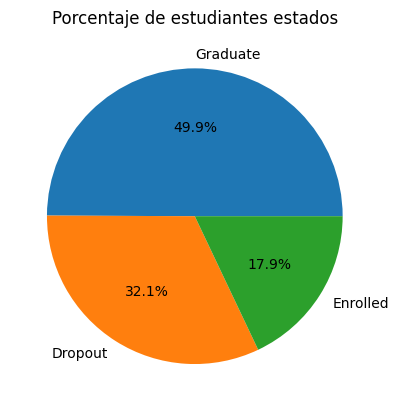

In [60]:
estudiantes_target = estudiantes['Target'].value_counts()

plt.pie(estudiantes_target, labels=estudiantes_target.index, autopct='%1.1f%%')

plt.title('Porcentaje de estudiantes estados')
plt.show()

La mayoria tiene un estado de Graduado

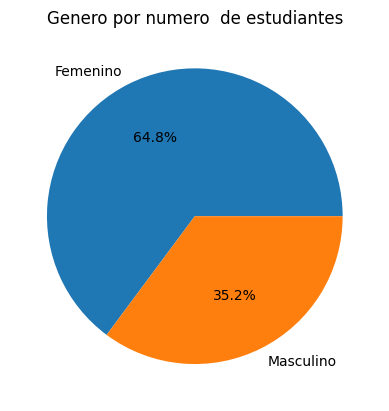

In [61]:
estudiantes_gender = estudiantes['Gender'].value_counts()

plt.pie(estudiantes_gender, labels=['Femenino','Masculino'], autopct='%1.1f%%')

plt.title('Genero por numero  de estudiantes')
plt.show()


Aproximadamente el 50% de los estudiantes en los datos se han graduado.
La mayor parte de los estudiantes son de genero femeninos





Demographics



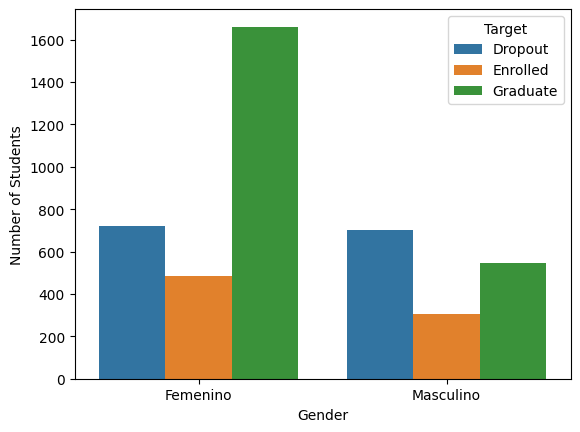

In [62]:
sns.countplot(data=estudiantes, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])
plt.ylabel('Number of Students')
plt.show()

Según los datos, una mayor cantidad de graduados son mujeres. Sin embargo, las mujeres también tienen la mayor cantidad de abandonos, aunque la diferencia es pequeña”.

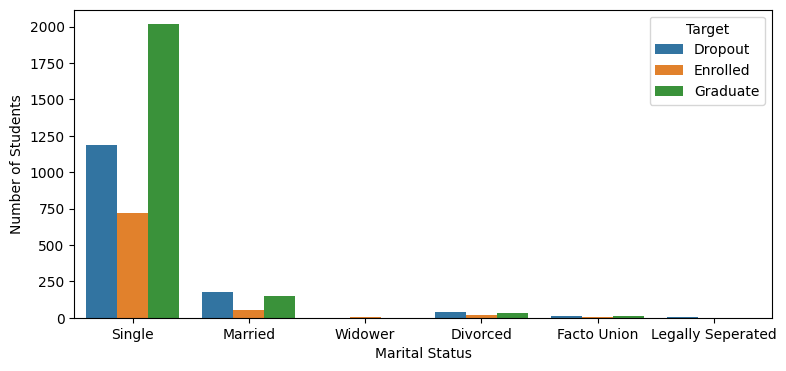

In [63]:
plt.figure(figsize=(9,4))

sns.countplot(data=estudiantes, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

Esta grafica no me permitio obtener un dato muy concreto debido a que puede ser que por la edad de cada estudiante hay mas probabilidades de que sean solteros

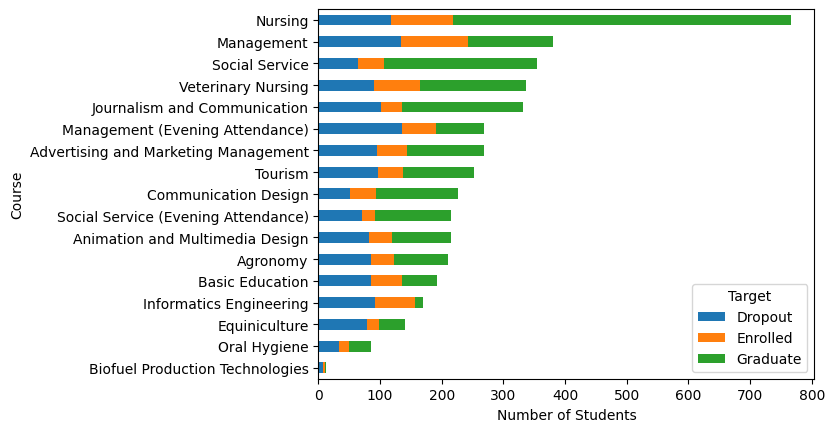

In [64]:
estudiantes_course = estudiantes.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)


estudiantes_course = estudiantes_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

estudiantes_course_total = estudiantes_course.sum(axis=1)
estudiantes_course_sorted = estudiantes_course_total.sort_values(ascending=True)
estudiantes_course.loc[estudiantes_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

El curso de enfermería produjo el mayor número de graduados, mientras que el curso de gestión tiene el mayor número de abandonos.

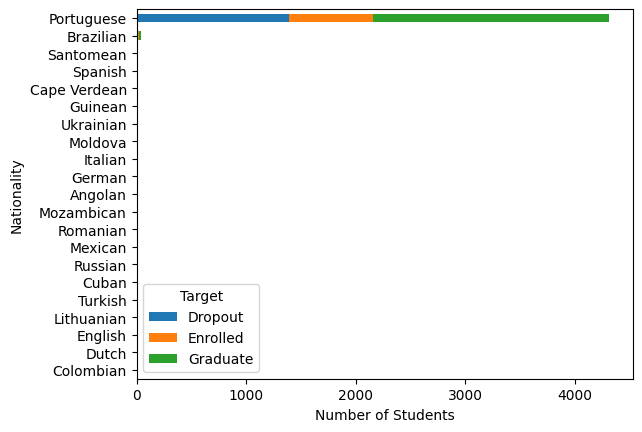

In [65]:
estudiantes_nationality = estudiantes.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)

estudiantes_nationality = estudiantes_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

estudiantes_nationality_total = estudiantes_nationality.sum(axis=1)
estudiantes_nationality_sorted = estudiantes_nationality_total.sort_values(ascending=True)
estudiantes_nationality.loc[estudiantes_nationality_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()

El gráfico muestra que la mayoría de los estudiantes en el conjunto de datos son portugueses, lo que representa la frecuencia más alta entre todas las nacionalidades.

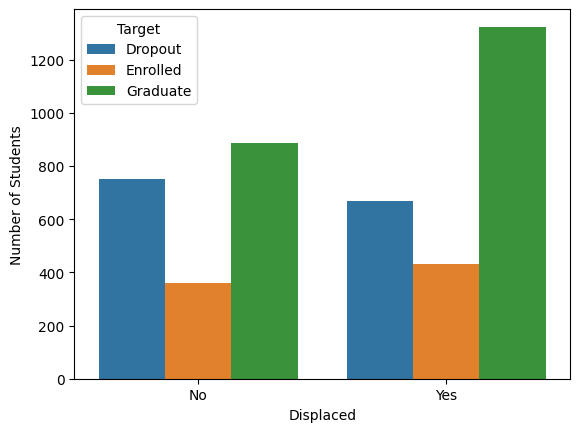

In [66]:
sns.countplot(data=estudiantes, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()


Los estudiantes que ya se graduaron son en su mayoría estudiantes desplazados. Segun nuestro Dataset esto significa: Si el estudiante es una persona desplazada. (Categórico) necesidades educativas especiales Si el alumno tiene alguna necesidad educativa especial. (Categórico)

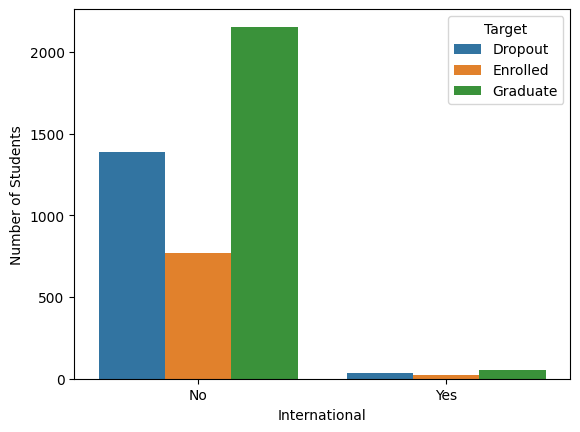

In [67]:
sns.countplot(data=estudiantes, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()


Dado que los estudiantes portugueses dominan los datos, se refleja en el número de estudiantes frente al diagrama de barras internacional.

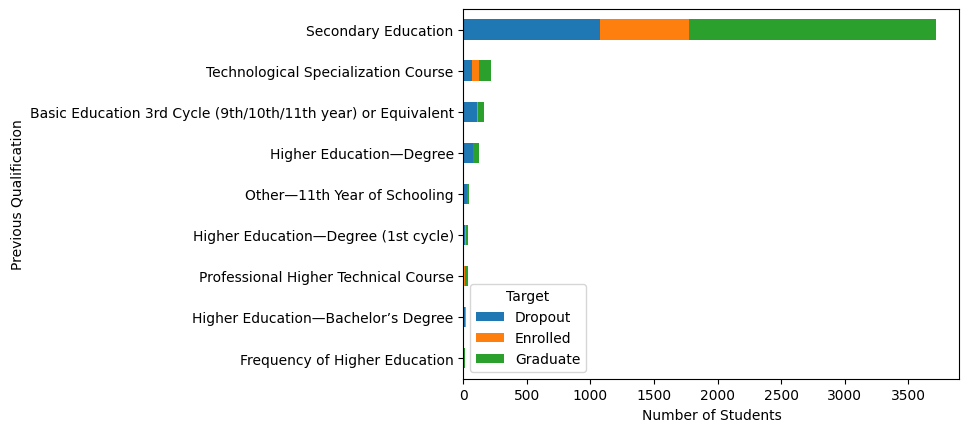

In [68]:
estudiantes_prequal = estudiantes.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0)

estudiantes_prequal = estudiantes_prequal.rename(index={1:'Secondary Education',2:'Higher Education—Bachelor’s Degree',3:'Higher Education—Degree',4:'Higher Education—Master’s Degree',5:'Higher Education—Doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—Not Completed',8:'11th Year of Schooling—Not Completed',9:'Other—11th Year of Schooling',10:'10th Year of Schooling',11:'10th Year of Schooling—Not Completed',12:'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent',13:'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent',14:'Technological Specialization Course',15:'Higher Education—Degree (1st cycle)',16:'Professional Higher Technical Course',17:'Higher Education—Master’s Degree (2nd Cycle)'})

estudiantes_prequal_total = estudiantes_prequal.sum(axis=1)
estudiantes_prequal_sorted = estudiantes_prequal_total.sort_values(ascending=True)
estudiantes_prequal_top = estudiantes_prequal_sorted[8:]
estudiantes_prequal.loc [estudiantes_prequal_top.index].plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()



La mayoría de los estudiantes en los datos terminaron la educación secundaria.



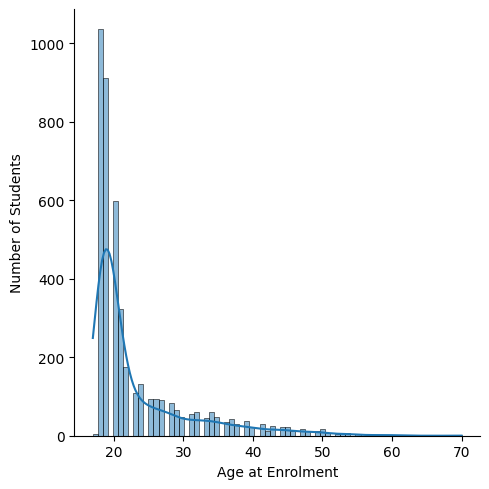

In [69]:
sns.displot(data=estudiantes, x='Age at enrollment', kde=True)
estudiantes['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

La distribución de la edad de inscripción tiene un sesgo positivo, lo que indica que la mayoría de los estudiantes se matricularon a una edad relativamente joven. La edad media de ingreso es de aproximadamente 23 años, siendo el rango de edad más frecuente entre los 19 y los 25 años.

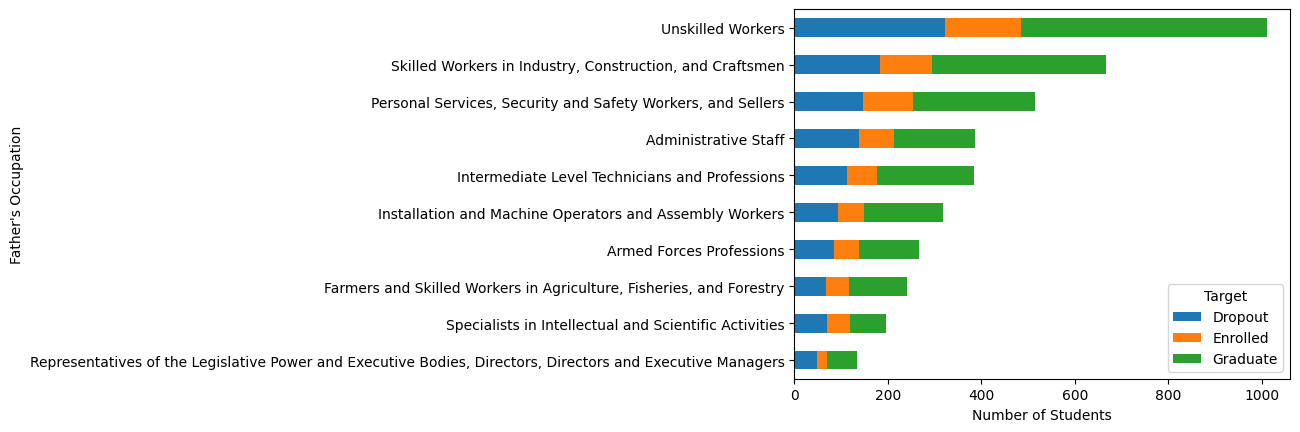

In [70]:
estudiantes_foccupation = estudiantes.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)

estudiantes_foccupation = estudiantes_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

estudiantes_foccupation_total = estudiantes_foccupation.sum(axis=1)
estudiantes_foccupation_sorted = estudiantes_foccupation_total.sort_values(ascending=True)
estudiantes_foccupation_top10 = estudiantes_foccupation_sorted[36:]
estudiantes_foccupation.loc[estudiantes_foccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.show()

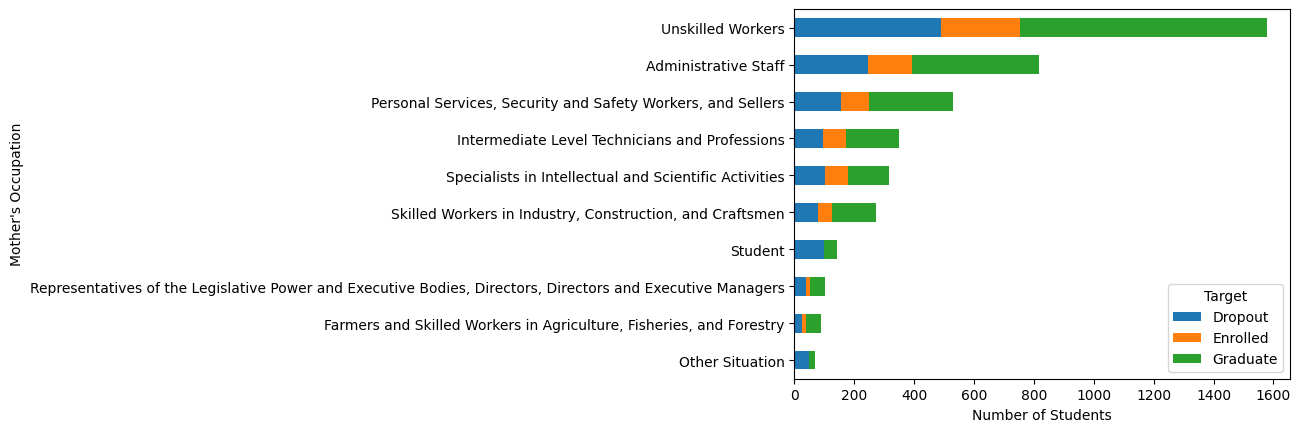

In [71]:
estudiantes_moccupation = estudiantes.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)

estudiantes_moccupation = estudiantes_moccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

estudiantes_moccupation_total = estudiantes_moccupation.sum(axis=1)
estudiantes_moccupation_sorted = estudiantes_moccupation_total.sort_values(ascending=True)
estudiantes_moccupation_top10 = estudiantes_moccupation_sorted[22:]
estudiantes_moccupation.loc[estudiantes_moccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.show()

El mayor número de estudiantes que se graduaron y abandonaron los estudios tienen padres que son trabajadores no calificados.

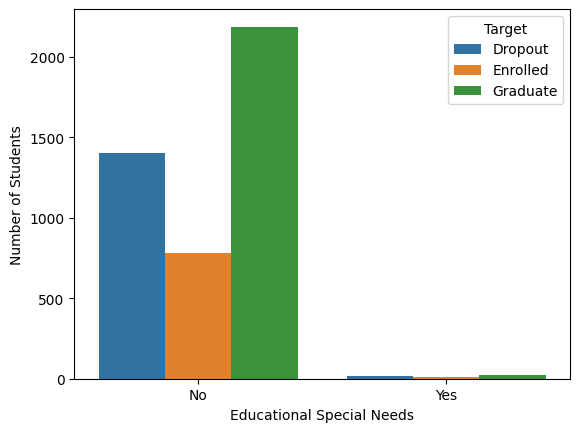

In [72]:
sns.countplot(data=estudiantes, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

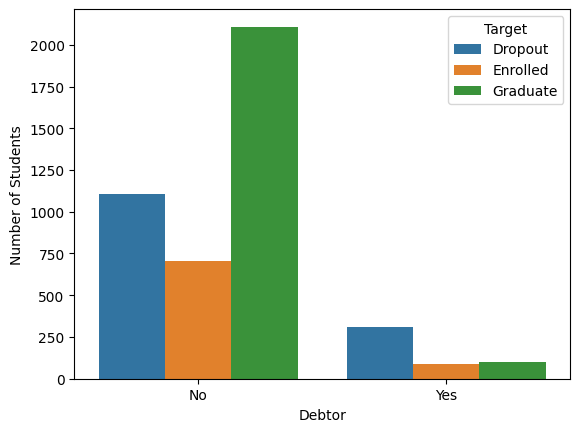

In [73]:
sns.countplot(data=estudiantes, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

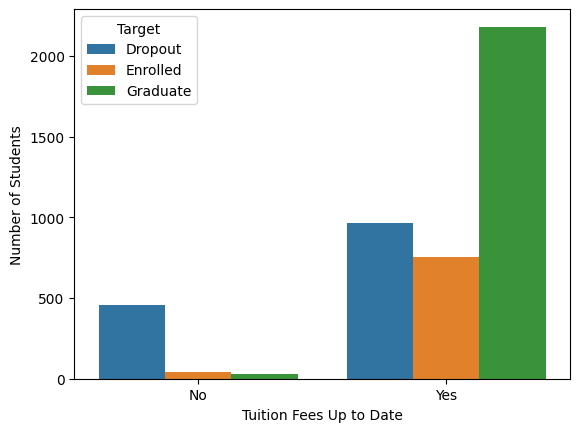

In [74]:
sns.countplot(data=estudiantes, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

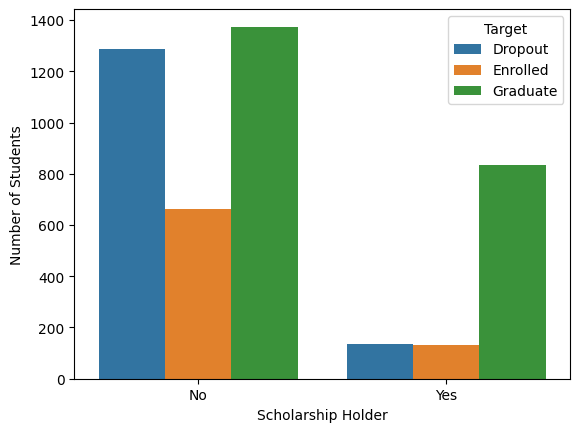

In [75]:
sns.countplot(data=estudiantes, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

En términos de otros niveles socioeconómicos, la mayoría de los estudiantes que se graduaron y abandonaron no tienen necesidades especiales. Además, son no deudores y sus derechos de matrícula están al día. Sin embargo, estos estudiantes no son becarios.

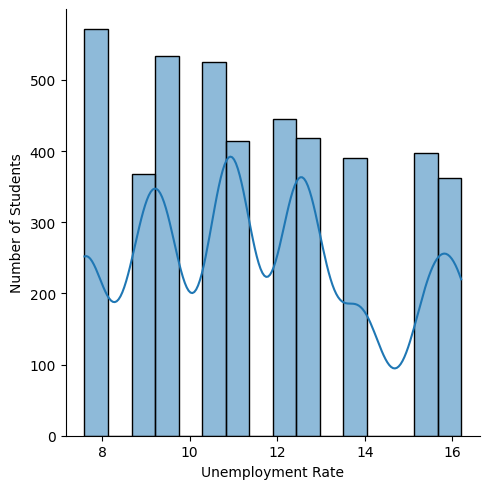

In [76]:
sns.displot(data=estudiantes, x="Unemployment rate", kde=True)
estudiantes['Unemployment rate'].describe()

plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()

La mayoría de los puntos de datos en la distribución de la tasa de desempleo estar dentro del rango de 9 a 13.

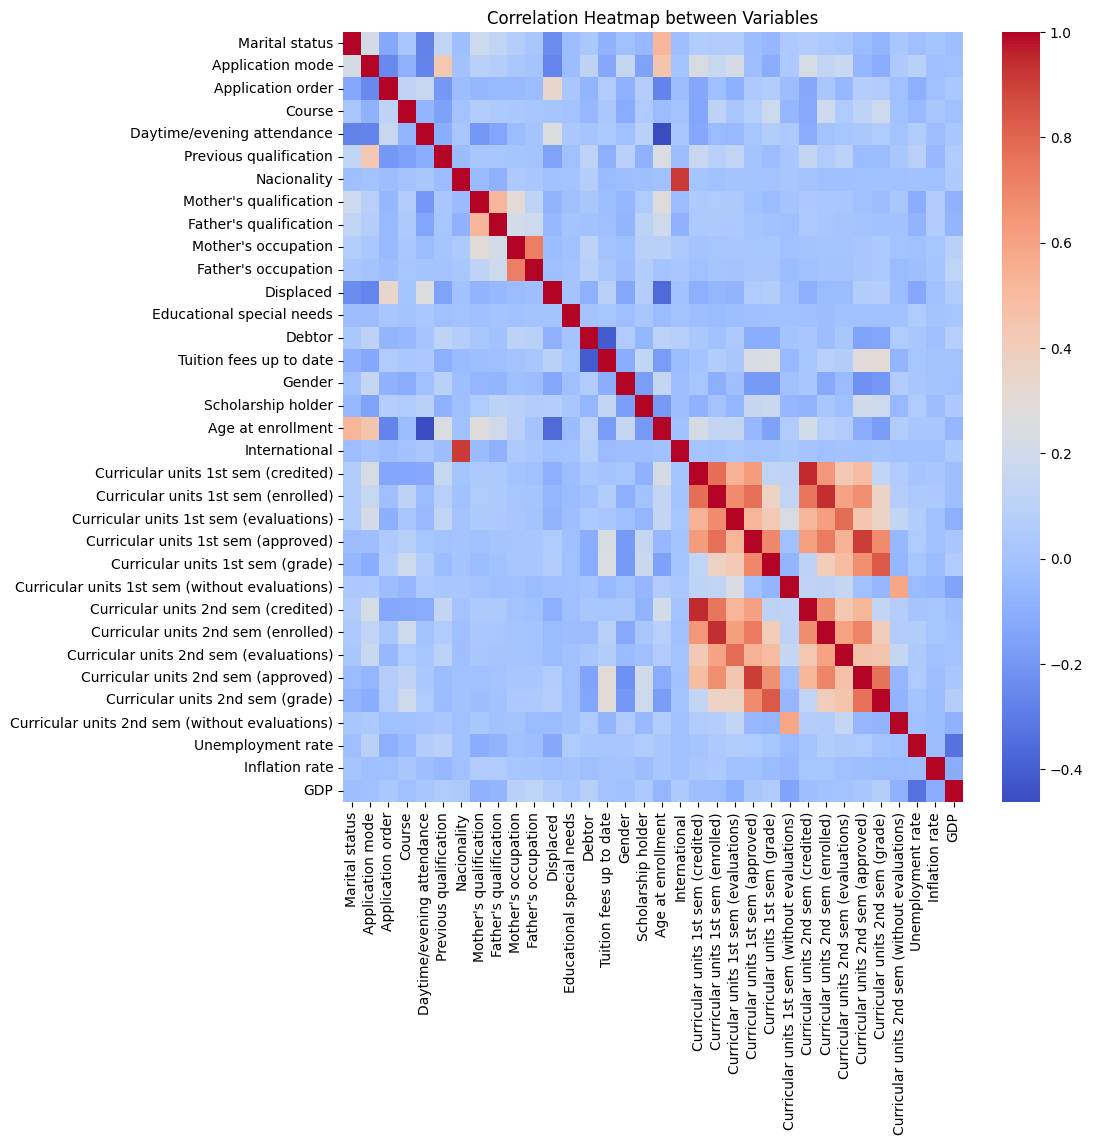

In [77]:
plt.figure(figsize=(10,10))

sns.heatmap(estudiantes.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

Aparentemente, la correlación entre características es baja excepto para Nacionalidad e Internacional. Por lo tanto, podemos descartar estas características en el modelo de regresión para predecir el objetivo de los estudiantes

EDA: realizaremos un análisis exploratorio de datos 


 Cuántos desertores, matriculados y graduados hay en la columna Objetivo

In [78]:
estudiantes['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

<Axes: xlabel='Target'>

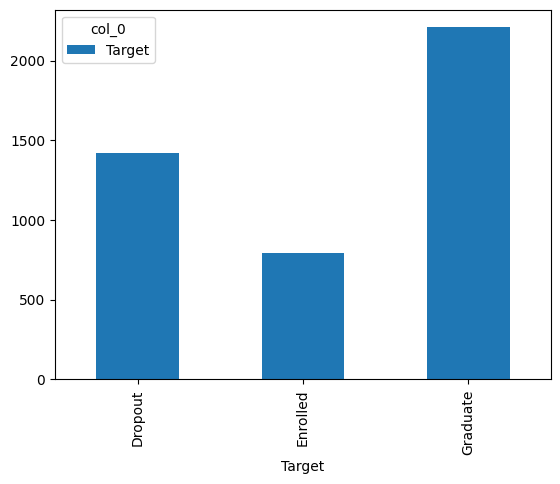

In [79]:
pd.crosstab(estudiantes.Target,['Target']).plot(kind='bar')

array([<Axes: ylabel='Target'>], dtype=object)

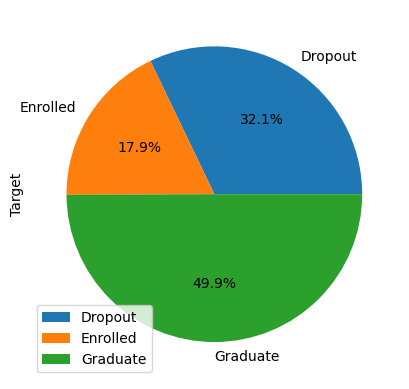

In [80]:
pd.crosstab(estudiantes.Target,['Target']).plot(kind='pie',subplots=True,autopct='%1.1f%%')

In [81]:
estudiantes['Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

In [82]:
print(estudiantes.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [83]:
print(estudiantes.duplicated().sum())

0


Solo la columna de Target no es numérica y podemos convertirla en numérica
Tenga en cuenta que la columna de Target es una columna de salida, por lo que la necesitamos en forma numérica para que podamos encontrar su correlación con otras

In [84]:
estudiantes['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [86]:
estudiantes['Target'] = estudiantes['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

Veamos que paso con Target

In [88]:
estudiantes

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [89]:
estudiantes.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

Finalmente encuentre la correlación de Target con todas las demás columnas numéricas

In [90]:
estudiantes.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [106]:
fig = px.imshow(estudiantes)
fig.show()